# Zestimate - EDA
By Lily Elizabeth John

In [73]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Data Dictionary and Labels Dataset

In [43]:
datadict=pd.read_excel(r"zillow_data_dictionary.xlsx",'Data Dictionary')
heatingorsystemtypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'HeatingOrSystemTypeID')
propertylandusetypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'PropertyLandUseTypeID')
storytypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'StoryTypeID')
airconditioningtypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'AirConditioningTypeID')
architecturalstyletypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'ArchitecturalStyleTypeID')
typeconstructiontypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'TypeConstructionTypeID')
buildingclasstypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'BuildingClassTypeID')

### Explore properties_2016.csv dataset

In [45]:
properties2016=pd.read_csv(r"properties_2016.csv",dtype={'hashottuborspa':'category','propertycountylandusecode':'str',\
                                                        'propertyzoningdesc':'str','fireplaceflag':'category',\
                                                        'taxdelinquencyflag':'category','heatingorsystemtypeid':'category',\
                                                        'propertylandusetypeid':'category','storytypeid':'category',\
                                                        'airconditioningtypeid':'category','architeturalstyletypeid':'category',\
                                                        'typeconstructiontypeid':'category','buildingclasstypeid':'category'})

In [46]:
properties2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [47]:
properties2016.shape

(2985217, 58)

In [48]:
properties2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           category
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             category
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashott

In [49]:
properties2016.head(2).T

,0,1
parcelid,10754147,10759547
airconditioningtypeid,NaN,NaN
architecturalstyletypeid,NaN,NaN
basementsqft,NaN,NaN
bathroomcnt,0,0
bedroomcnt,0,0
buildingclasstypeid,NaN,NaN
buildingqualitytypeid,NaN,NaN
calculatedbathnbr,NaN,NaN
decktypeid,NaN,NaN


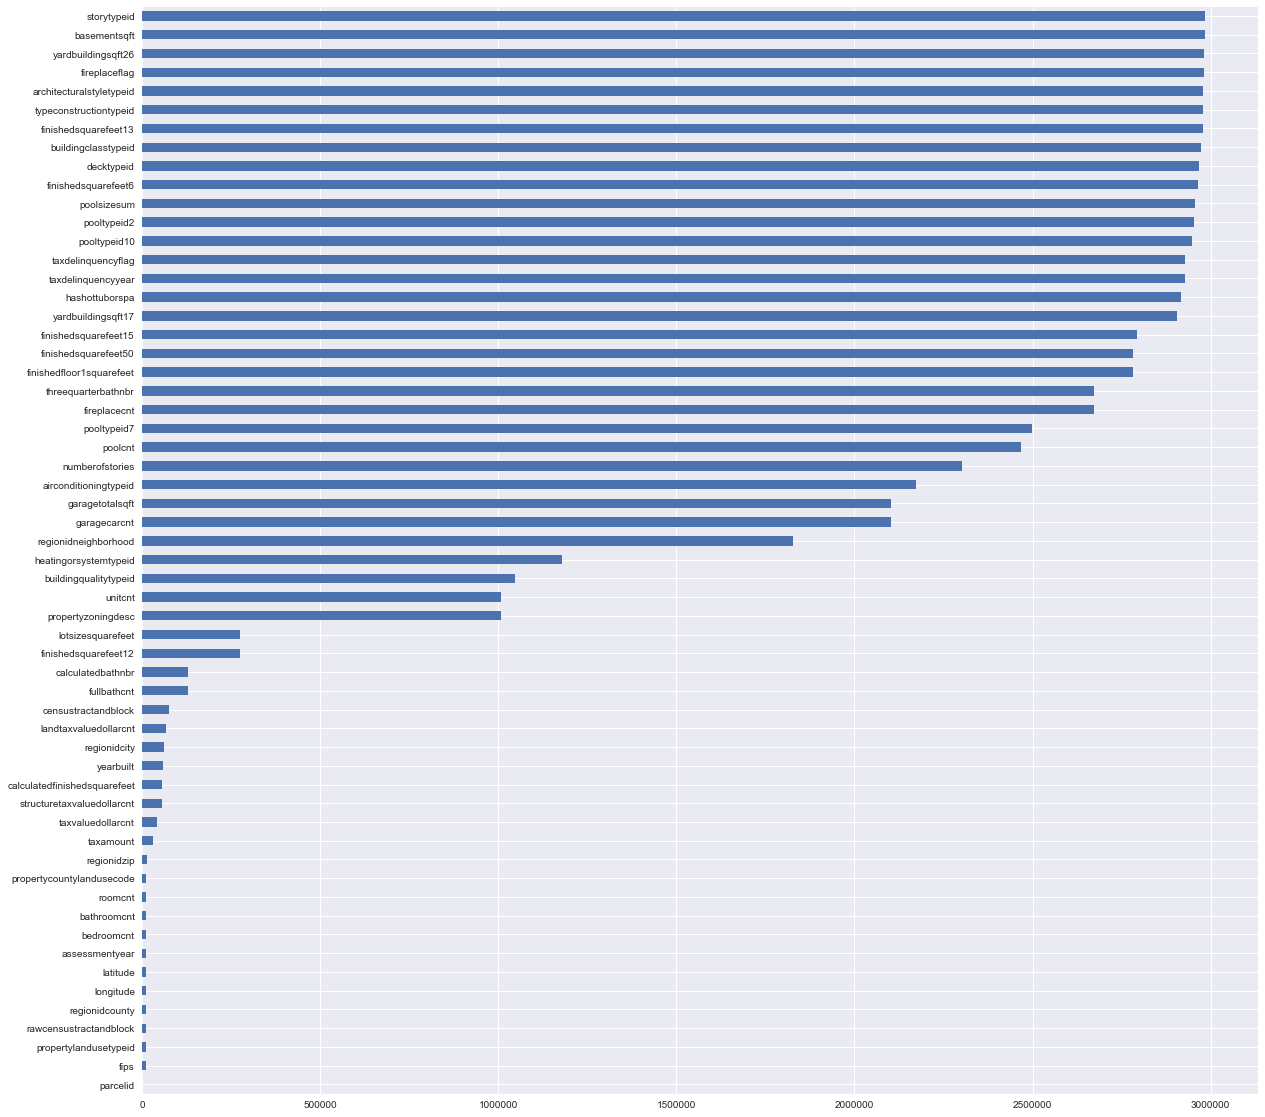

In [77]:
plt.figure(figsize=(20,20))
missing_df=properties2016.isnull().sum().sort_values(ascending=True)
missing_df.plot(kind='barh')

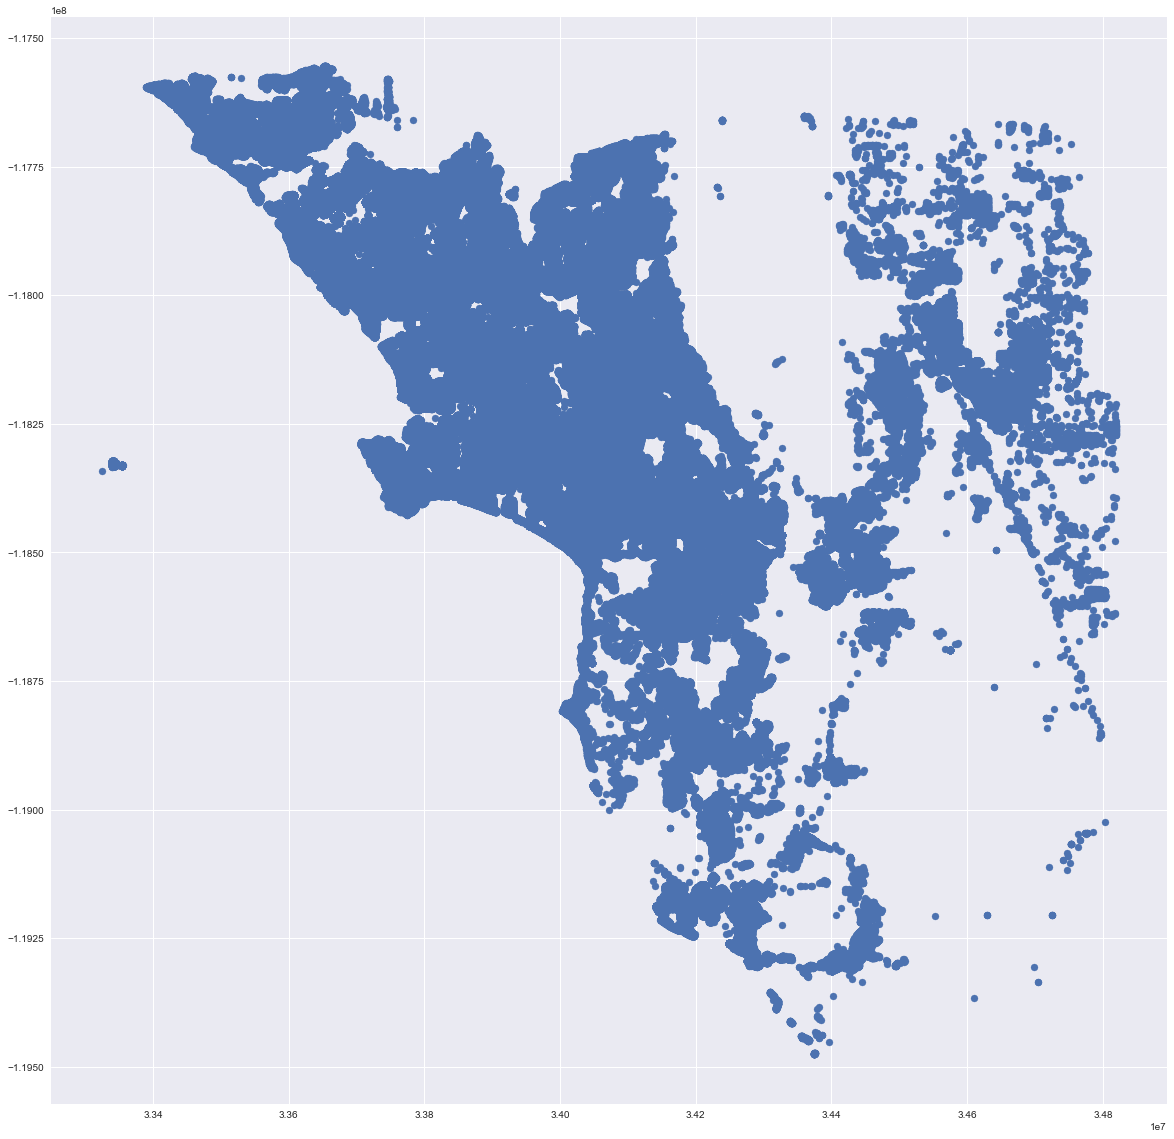

In [79]:
plt.figure(figsize=(20,20))
plt.scatter(x=properties2016.latitude,y=properties2016.longitude)